In [116]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame

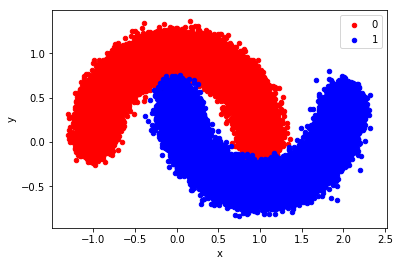

In [239]:
# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [126]:
alpha, epochs = 0.001, 150
m, n = x.shape 
y = y.reshape(m, 1)
print('m =', m) 
print('n =', n) 
print('q =', q) 
print('Learning Rate =', alpha) 
print('Number of Epochs =', epochs)

m = 10000
n = 2
q = (100000,)
Learning Rate = 0.001
Number of Epochs = 150


In [127]:
X = tf.placeholder(tf.float32, [None, n])
# y can only take two values
Y = tf.placeholder(tf.float32, [m, None])
# trainable variable weights
W = tf.Variable(tf.zeros([n, 1]))
# trainable variable bias
b = tf.Variable(tf.zeros([1]))

In [128]:
# hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))
# sigmoid cross entropy cost function
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
    logits = Y_hat, labels = Y)
# Gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(
        learning_rate = alpha).minimize(cost)
# global variables initializer
init = tf.global_variables_initializer()

In [129]:
# start session
saver = tf.train.Saver()
with tf.Session() as sess:
    #initialize variables
    sess.run(init)
    #lists for storing and chaning Cost and Accuracy
    cost_history, accuracy_history = [], []
    # Iterating through all the epochs
    for epoch in range(epochs):
        cost_per_epoch = 0
        
        # Optimizer
        sess.run(optimizer, feed_dict = {X : x, Y : y})
        # Calculate cost on current Epoch
        c = sess.run(cost, feed_dict = {X : x, Y : y})
        
        # Calculating accuracy on current Epoch
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                         tf.float32))
        # Storing Cost and Accuracy to the history
        cost_history.append(sum(sum(c)))
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100)
        
        # Displaying result on current Epoch
        if epoch % 50 == 0 and epoch !=0:
            print("Epoch " + str(epoch) + "Cost: "
                 + str(cost_history[-1]))
            save_path = saver.save(sess, "/tmp/my_model.ckpt")
            sess.run(optimizer, feed_dict={X: x, Y: y})
    
    Weight = sess.run(W) # Optimized Weight
    Bias = sess.run(b) # Optimized bias
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")
    
    #Final Accuracy
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
                                 tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                     tf.float32))
    print("\nAccuracy:", accuracy_history[-1], "%")

Epoch 50Cost: 5685.96337890625
Epoch 100Cost: 5641.16650390625

Accuracy: 100.0 %


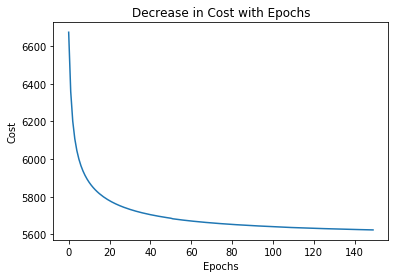

In [130]:
plt.plot(list(range(epochs)), cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 
  
plt.show() 

# Implementing mini-batch gradient descent

In [232]:
alpha, epochs = 0.001, 100
m, n = x.shape 
y = y.reshape(m, 1)
print('m =', m) 
print('n =', n) 
print('q =', q) 
print('Learning Rate =', alpha) 
print('Number of Epochs =', epochs)

m = 1000
n = 2
q = (100000,)
Learning Rate = 0.001
Number of Epochs = 100


In [233]:
X = tf.placeholder(tf.float32, [None, n])
# y can only take two values
Y = tf.placeholder(tf.float32, [None, None])
# trainable variable weights
W = tf.Variable(tf.zeros([n, 1]))
# trainable variable bias
b = tf.Variable(tf.zeros([1]))

In [234]:
# hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))
# sigmoid cross entropy cost function
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
    logits = Y_hat, labels = Y)
# Gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(
        learning_rate = alpha).minimize(cost)
# global variables initializer
init = tf.global_variables_initializer()

In [235]:
# start session
saver = tf.train.Saver()

batch_size = 10
n_batches = int(np.ceil(m / batch_size))

def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  
    indices = np.random.randint(m, size=batch_size)  
    X_batch = x[indices] 
    y_batch = y[indices] 
    return X_batch, y_batch
with tf.Session() as sess:
    #initialize variables
    sess.run(init)
    #lists for storing and chaning Cost and Accuracy
    cost_history, accuracy_history = [], []
    # Iterating through all the epochs
    for epoch in range(epochs):
        cost_per_epoch = 0
                
        # Calculating accuracy on current Epoch
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                         tf.float32))
        if epoch % 50 == 0 and epoch !=0:
            for batch_index in range(n_batches):
                X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
                save_path = saver.save(sess, "/tmp/my_model.ckpt")
                sess.run(optimizer, feed_dict={X: X_batch, Y: y_batch})
                c = sess.run(cost, feed_dict = {X : X_batch, Y : y_batch})
                # Storing Cost and Accuracy to the history
                cost_history.append(sum(sum(c)))
                accuracy_history.append(accuracy.eval({X : X_batch, Y : y_batch}) * 100)
                print("Epoch " + str(epoch) + "Cost: "
                 + str(cost_history[-1]))
    
    Weight = sess.run(W) # Optimized Weight
    Bias = sess.run(b) # Optimized bias
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")
    
    #Final Accuracy
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
                                 tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                     tf.float32))
    print("\nAccuracy:", accuracy_history[-1], "%")

Epoch 50Cost: 7.239833831787109
Epoch 50Cost: 5.739569664001465
Epoch 50Cost: 7.739692687988281
Epoch 50Cost: 6.738664150238037
Epoch 50Cost: 7.239663124084473
Epoch 50Cost: 7.237040042877197
Epoch 50Cost: 7.23534631729126
Epoch 50Cost: 6.236869812011719
Epoch 50Cost: 6.736176490783691
Epoch 50Cost: 7.73687744140625
Epoch 50Cost: 7.235602378845215
Epoch 50Cost: 5.736743927001953
Epoch 50Cost: 7.733392238616943
Epoch 50Cost: 5.233590602874756
Epoch 50Cost: 6.731406211853027
Epoch 50Cost: 8.225132942199707
Epoch 50Cost: 7.224674701690674
Epoch 50Cost: 6.230160236358643
Epoch 50Cost: 7.2281174659729
Epoch 50Cost: 8.725605964660645
Epoch 50Cost: 7.727282524108887
Epoch 50Cost: 7.725484371185303
Epoch 50Cost: 8.223379135131836
Epoch 50Cost: 6.2262492179870605
Epoch 50Cost: 7.222292423248291
Epoch 50Cost: 7.224551677703857
Epoch 50Cost: 6.724889755249023
Epoch 50Cost: 5.725355625152588
Epoch 50Cost: 8.216049194335938
Epoch 50Cost: 7.711762428283691
Epoch 50Cost: 7.7152323722839355
Epoch 50Co

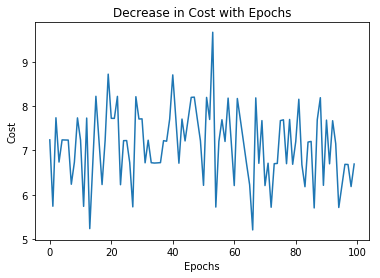

In [236]:
plt.plot(range(epochs), cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 
  
plt.show() 

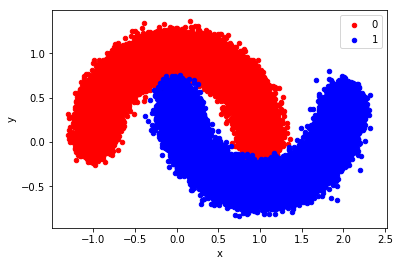

In [246]:
# generate 2d classification dataset
x, y = make_moons(n_samples=1000, noise=0.1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [259]:
alpha, epochs = 0.001, 100
m, n = x.shape 
y = y.reshape(m, 1)
print('m =', m) 
print('n =', n) 
print('q =', q) 
print('Learning Rate =', alpha) 
print('Number of Epochs =', epochs)

m = 1000
n = 2
q = (100000,)
Learning Rate = 0.001
Number of Epochs = 100


In [260]:
X = tf.placeholder(tf.float32, [None, n])
# y can only take two values
Y = tf.placeholder(tf.float32, [None, None])
# trainable variable weights
W = tf.Variable(tf.zeros([n, 1]))
# trainable variable bias
b = tf.Variable(tf.zeros([1]))

In [261]:
# hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))
# sigmoid cross entropy cost function
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
    logits = Y_hat, labels = Y)
# Gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(
        learning_rate = alpha).minimize(cost)
# global variables initializer
init = tf.global_variables_initializer()

In [237]:
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [262]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [266]:
error = Y_hat - y
mse = tf.reduce_mean(tf.square(error), name="mse")
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [268]:
# start session
saver = tf.train.Saver()

batch_size = 10
n_batches = int(np.ceil(m / batch_size))

def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  
    indices = np.random.randint(m, size=batch_size)  
    X_batch = x[indices] 
    y_batch = y[indices] 
    return X_batch, y_batch
with tf.Session() as sess:
    #initialize variables
    sess.run(init)
    #lists for storing and chaning Cost and Accuracy
    cost_history, accuracy_history = [], []
    # Iterating through all the epochs
    for epoch in range(epochs):
        cost_per_epoch = 0
                
        # Calculating accuracy on current Epoch
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                         tf.float32))
        if epoch % 50 == 0 and epoch !=0:
            for batch_index in range(n_batches):
                X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
                if batch_index % 5 == 0:
                    summary_str = mse_summary.eval(feed_dict={X: X_batch, Y: y_batch})
                    step = epoch * n_batches + batch_index
                    file_writer.add_summary(summary_str, step)
                c = sess.run(cost, feed_dict = {X : X_batch, Y : y_batch})
                sess.run(optimizer, feed_dict={X: X_batch, Y: y_batch})
                save_path = saver.save(sess, "/tmp/my_model.ckpt")
                # Storing Cost and Accuracy to the history
                cost_history.append(sum(sum(c)))
                accuracy_history.append(accuracy.eval({X : X_batch, Y : y_batch}) * 100)
                print("Epoch " + str(epoch) + "Cost: "
                 + str(cost_history[-1]))
    
    Weight = sess.run(W) # Optimized Weight
    Bias = sess.run(b) # Optimized bias
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")
    
    #Final Accuracy
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
                                 tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                     tf.float32))
    print("\nAccuracy:", accuracy_history[-1], "%")

InvalidArgumentError: Incompatible shapes: [10,1] vs. [1000,1]
	 [[node sub (defined at <ipython-input-266-a72cd5ade8cc>:1) ]]

Caused by op 'sub', defined at:
  File "/Users/davescott/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/davescott/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/Users/davescott/anaconda3/lib/python3.7/asyncio/base_events.py", line 539, in run_forever
    self._run_once()
  File "/Users/davescott/anaconda3/lib/python3.7/asyncio/base_events.py", line 1775, in _run_once
    handle._run()
  File "/Users/davescott/anaconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-266-a72cd5ade8cc>", line 1, in <module>
    error = Y_hat - y
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py", line 824, in binary_op_wrapper
    return func(x, y, name=name)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_math_ops.py", line 9536, in sub
    "Sub", x=x, y=y, name=name)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/Users/davescott/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Incompatible shapes: [10,1] vs. [1000,1]
	 [[node sub (defined at <ipython-input-266-a72cd5ade8cc>:1) ]]
